In [75]:
import numpy as np
import pandas as pd

In [76]:
housing=pd.read_csv("Housing.csv")

In [77]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [78]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [79]:
housing["mainroad"]=housing["mainroad"].map({'yes':1,'no':0})
housing["basement"]=housing["basement"].map({'yes':1,'no':0})
housing["guestroom"]=housing["guestroom"].map({'yes':1,'no':0})
housing["hotwaterheating"]=housing["hotwaterheating"].map({'yes':1,'no':0})
housing["airconditioning"]=housing["airconditioning"].map({'yes':1,'no':0})
housing["prefarea"]=housing["prefarea"].map({'yes':1,'no':0})

In [80]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [81]:
status=pd.get_dummies(housing["furnishingstatus"])
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [82]:
status=pd.get_dummies(housing["furnishingstatus"],drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [83]:
housing=pd.concat([housing,status],axis=1)

In [84]:
housing.drop(["furnishingstatus"],axis=1,inplace=True)

In [85]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [86]:
housing["areaperbedroom"]=housing["area"]/housing["bedrooms"]
housing["bbratio"]=housing["bathrooms"]/housing["bedrooms"]
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [87]:
def normalize(x):
    return ((x-np.min(x))/(max(x)-min(x)))

housing=housing.apply(normalize)

In [88]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [89]:
X=housing[["area","airconditioning","areaperbedroom","basement","bathrooms","bbratio","bedrooms","guestroom","hotwaterheating","mainroad","parking","prefarea","semi-furnished","stories","unfurnished"]]
y=housing["price"]


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [92]:
import statsmodels.api as sm

In [93]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
X_train=sm.add_constant(X_train)

In [95]:
lm_1=sm.OLS(y_train,X_train).fit()

In [96]:
print(lm_1.summary())
#r-squared--->1
#p value should be less than 0.05

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.56e-82
Time:                        19:15:30   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

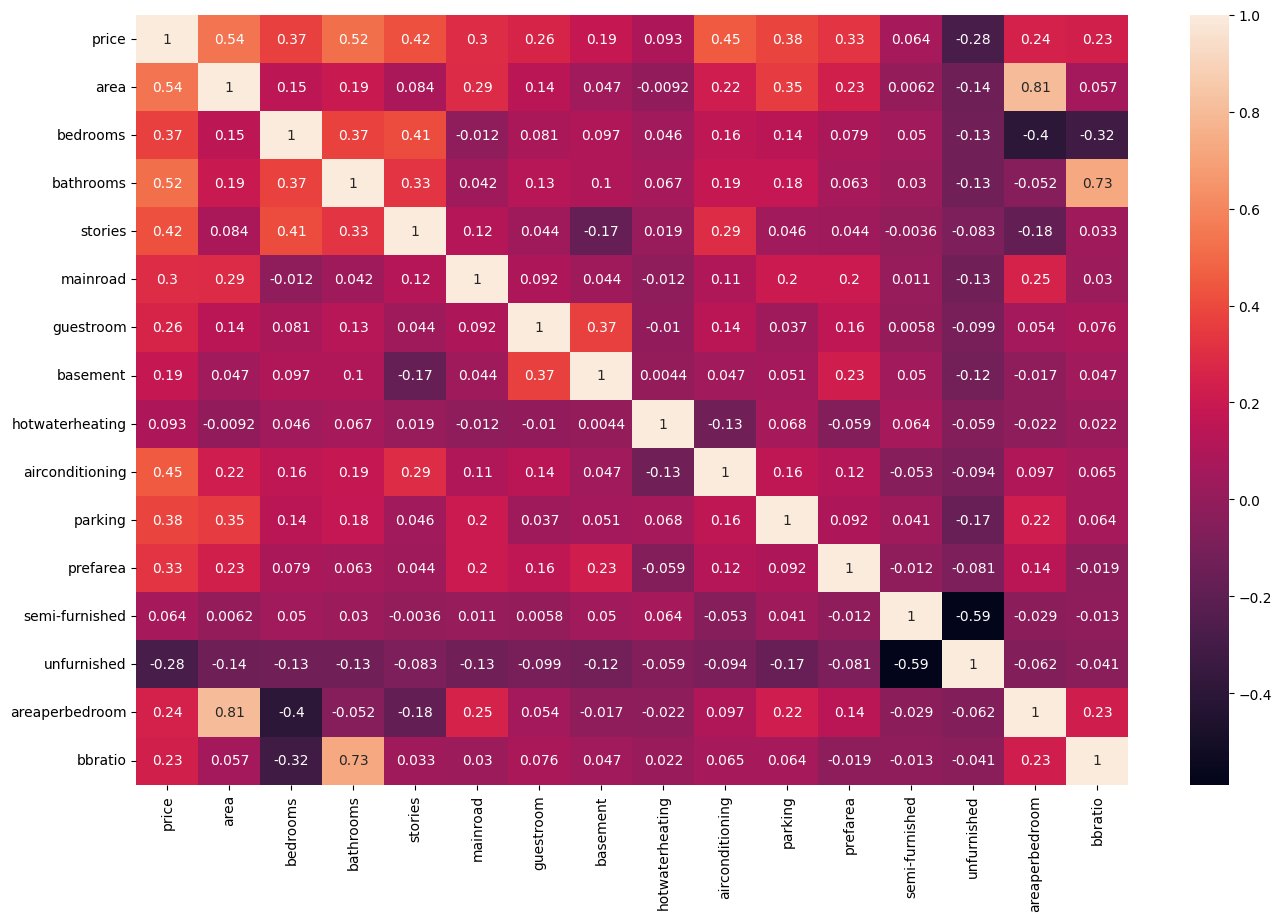

In [98]:
plt.figure(figsize=(16,10))
sns.heatmap(housing.corr(),annot=True)
plt.show()
#should be near 0 not towards to 1 or -1(HIghly Co-related)

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(input_data):
    vif=pd.DataFrame()
    vif["variables"]=input_data.columns
    vif["VIF"]=[variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by='VIF',ascending=False)

vif_scores(X)

,variables,VIF
2,areaperbedroom,68.707105
0,area,57.516048
5,bbratio,29.249998
4,bathrooms,11.106354
6,bedrooms,10.683404
9,mainroad,7.910522
13,stories,2.805901
12,semi-furnished,2.614252
14,unfurnished,2.382862
3,basement,2.045854


In [100]:
vif_scores(X.drop("bbratio",1))

C:\Users\HP\AppData\Local\Temp\ipykernel_13308\727991244.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop("bbratio",1))


,variables,VIF
0,area,20.716025
2,areaperbedroom,18.437262
5,bedrooms,10.026456
8,mainroad,7.459237
12,stories,2.783201
11,semi-furnished,2.484125
13,unfurnished,2.204838
3,basement,2.027730
9,parking,2.004052
1,airconditioning,1.768236


In [101]:
vif_scores(X.drop(["bedrooms","bbratio"],1))

C:\Users\HP\AppData\Local\Temp\ipykernel_13308\1962195289.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(["bedrooms","bbratio"],1))


,variables,VIF
0,area,14.978857
2,areaperbedroom,13.881473
7,mainroad,6.099134
11,stories,2.559555
10,semi-furnished,2.037729
8,parking,1.999982
3,basement,1.901473
1,airconditioning,1.762488
12,unfurnished,1.722278
4,bathrooms,1.692180


In [102]:
vif_scores(X.drop(["bedrooms","bbratio","areaperbedroom"],1))

C:\Users\HP\AppData\Local\Temp\ipykernel_13308\1585184545.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(["bedrooms","bbratio","areaperbedroom"],1))


,variables,VIF
6,mainroad,5.513523
0,area,4.427217
10,stories,2.323144
9,semi-furnished,2.004738
7,parking,1.987943
2,basement,1.896942
1,airconditioning,1.760737
11,unfurnished,1.652372
3,bathrooms,1.619363
8,prefarea,1.497335


In [103]:
vif_scores(X.drop(["bedrooms","bbratio","areaperbedroom","mainroad","semi-furnished"],1))
#vif value should be less than 5

C:\Users\HP\AppData\Local\Temp\ipykernel_13308\382584239.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  vif_scores(X.drop(["bedrooms","bbratio","areaperbedroom","mainroad","semi-furnished"],1))


,variables,VIF
0,area,3.225217
8,stories,2.057223
6,parking,1.931996
2,basement,1.759588
1,airconditioning,1.753370
3,bathrooms,1.608422
7,prefarea,1.475144
4,guestroom,1.470757
9,unfurnished,1.255849
5,hotwaterheating,1.077981


In [104]:
X=housing[["area","bathrooms","stories","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","unfurnished"]]
y=housing["price"]


In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [106]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
lm_2=sm.OLS(y_train,X_train).fit()

In [107]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     75.10
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           9.15e-83
Time:                        19:15:32   Log-Likelihood:                 375.00
No. Observations:                 381   AIC:                            -728.0
Df Residuals:                     370   BIC:                            -684.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0638      0.012     

In [108]:
y_pred=lm_2.predict(X_test)

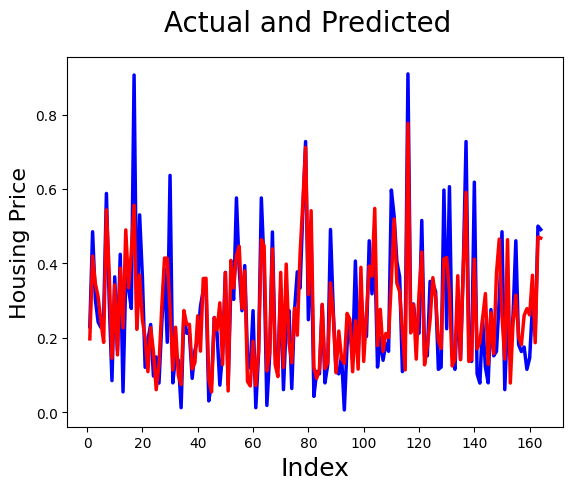

In [109]:
c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color="blue",linewidth=2.5,linestyle="-") #plotting actual
plt.plot(c,y_pred,color="red",linewidth=2.5,linestyle="-") #plotting predicted
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Housing Price",fontsize=16)
plt.show()

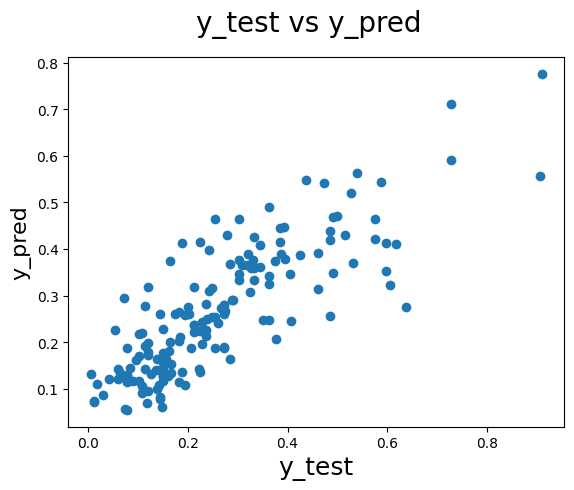

In [110]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)
plt.show()

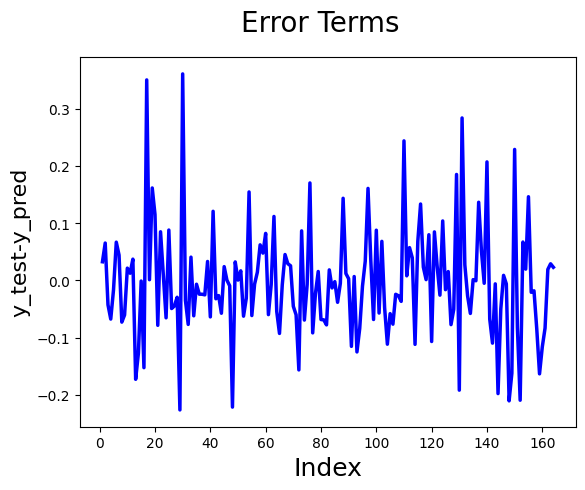

In [111]:
fig=plt.figure()
c=[i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred,color="blue",linewidth=2.5,linestyle="-") #plotting actual
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("Index",fontsize=18)
plt.ylabel("y_test-y_pred",fontsize=16)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13308\277503379.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


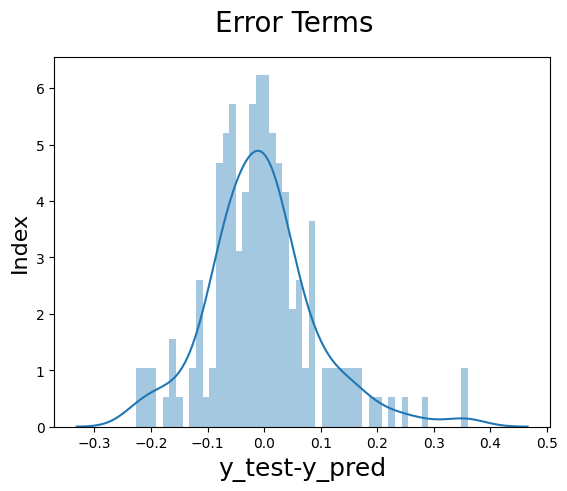

In [113]:
fig=plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("y_test-y_pred",fontsize=18)
plt.ylabel("Index",fontsize=16)
plt.show()


In [114]:
from sklearn import metrics
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE : 0.09715845527341418


In [115]:
print("MSE :",metrics.mean_squared_error(y_test,y_pred))

MSE : 0.009439765431116026


In [117]:
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
# as low as good

MAE : 0.07022885612456774


In [118]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [119]:
lm = LinearRegression()
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True  True False False False]
[7 1 1 1 4 6 1 1 3 2 5]


In [120]:
print(len(X.columns))
col = X_train.columns[rfe.support_]
print(col)

10
Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning'], dtype='object')


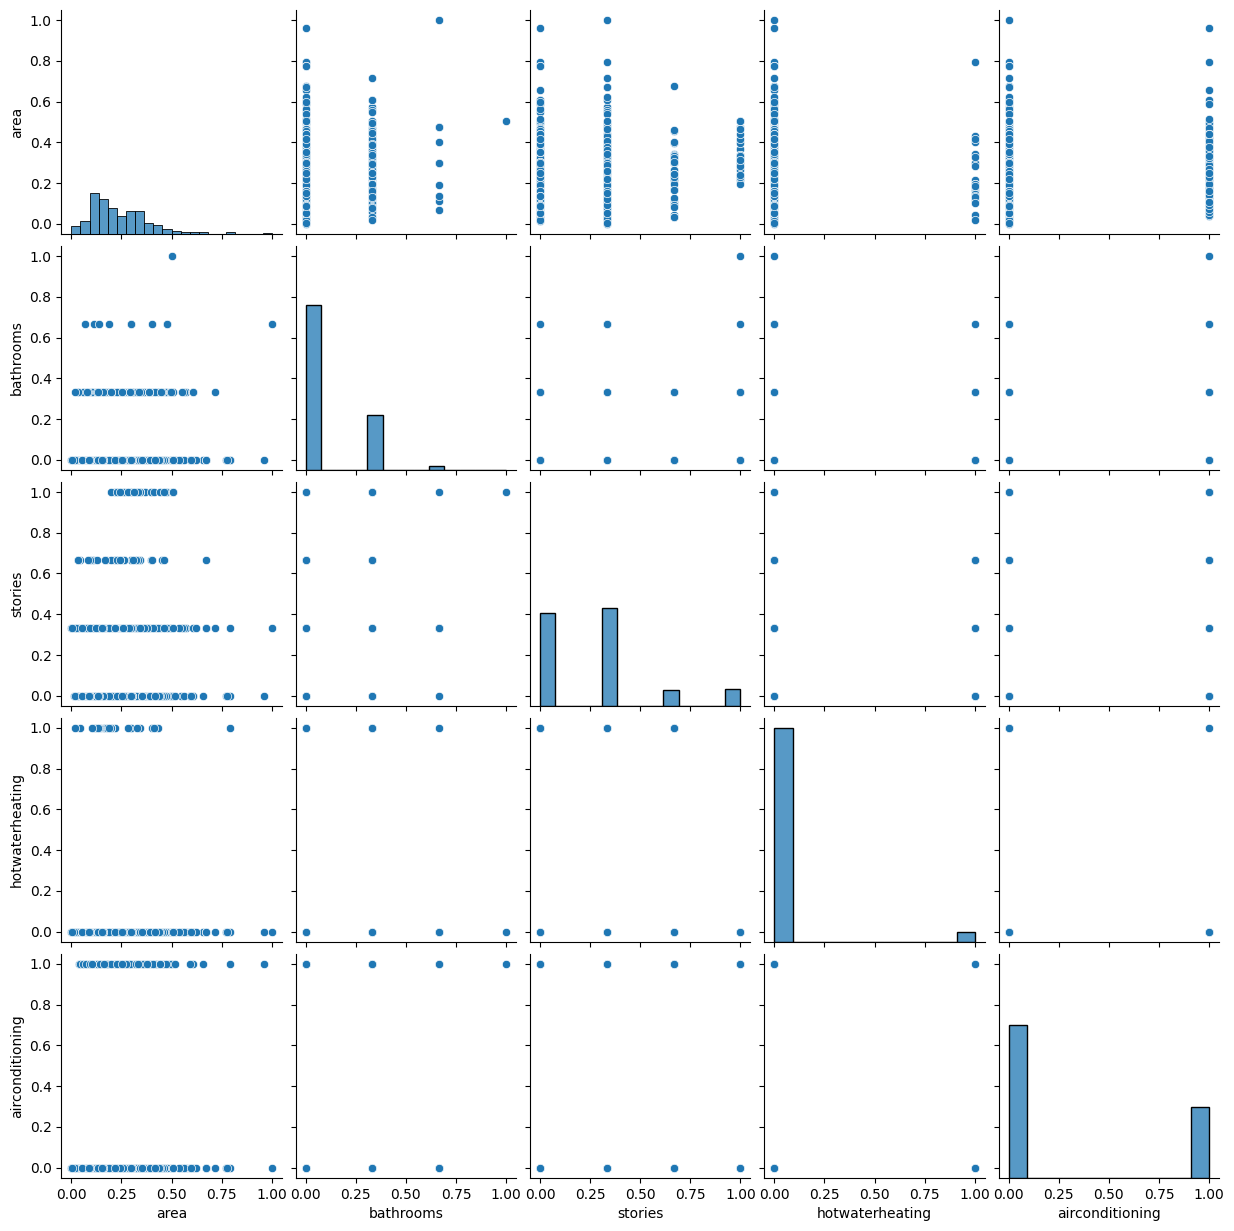

In [121]:
sns.pairplot(housing[col])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


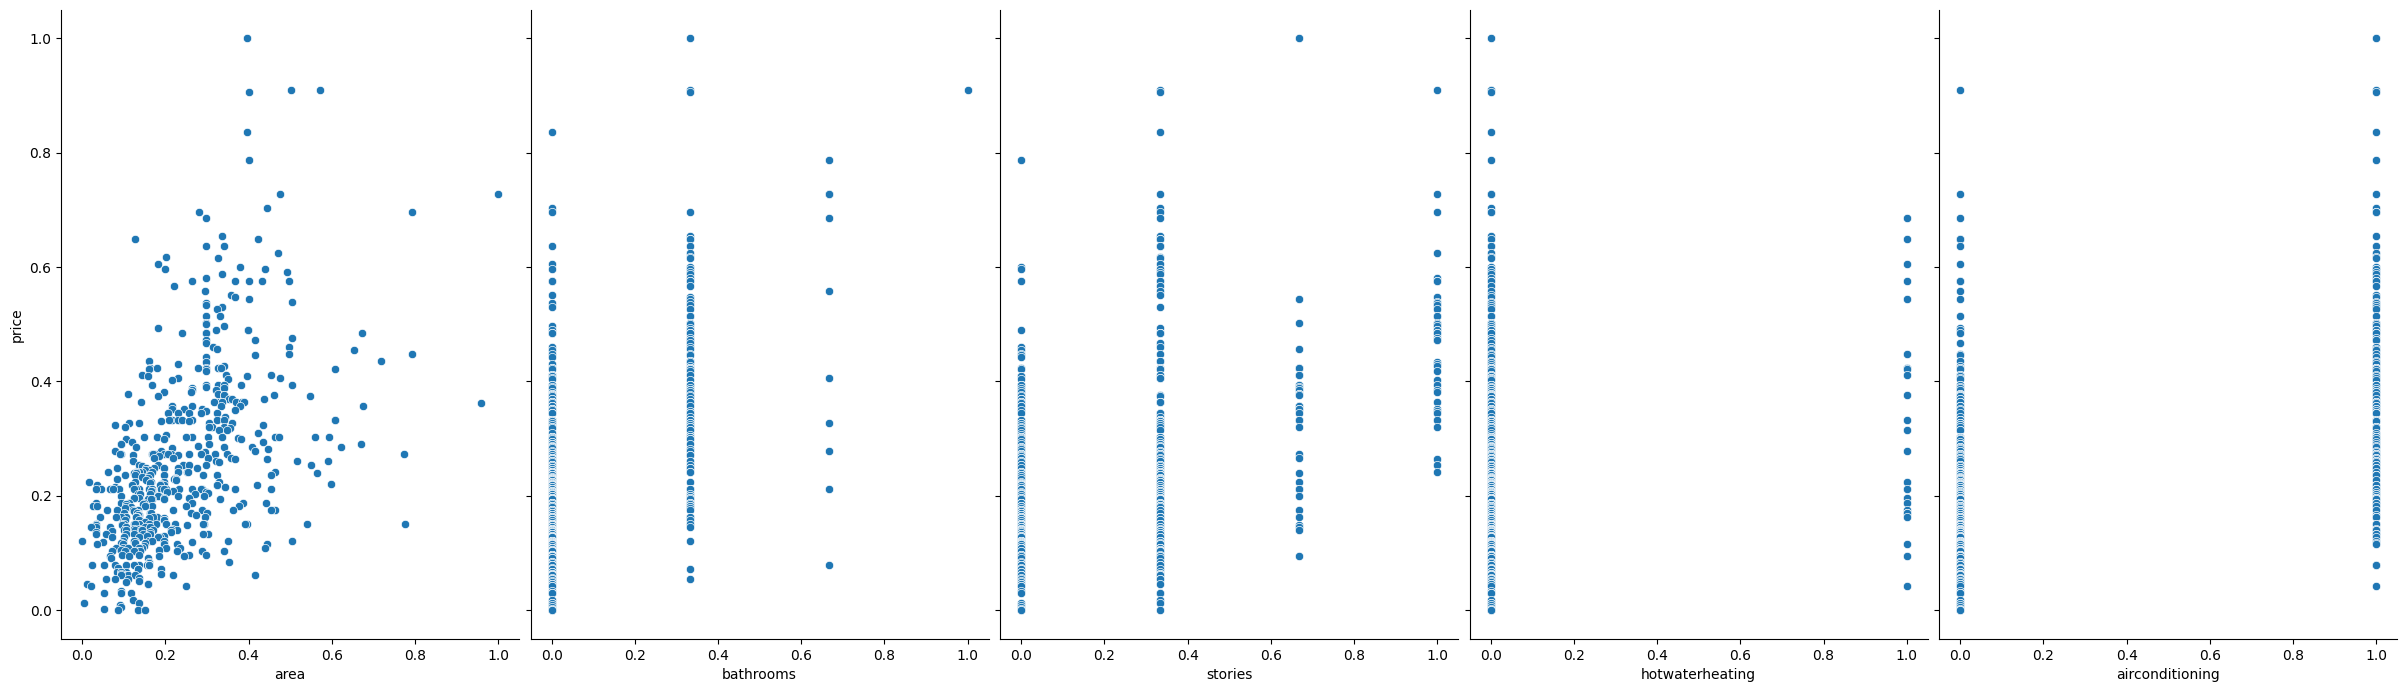

In [122]:
sns.pairplot(housing,x_vars=col,y_vars="price",size=7,aspect=0.7,kind="scatter")

In [123]:
X_train_rfe=X_train[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     110.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.79e-71
Time:                        19:45:44   Log-Likelihood:                 336.26
No. Observations:                 381   AIC:                            -660.5
Df Residuals:                     375   BIC:                            -636.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0625      0.011     

In [124]:
vif_scores(housing[col])

,variables,VIF
2,stories,1.981353
0,area,1.955661
4,airconditioning,1.708072
1,bathrooms,1.546809
3,hotwaterheating,1.062917


In [125]:
X_train_rfe=X_test[col]
X_train_rfe=sm.add_constant(X_train_rfe)
y_pred = lm_3.predict(X_train_rfe)

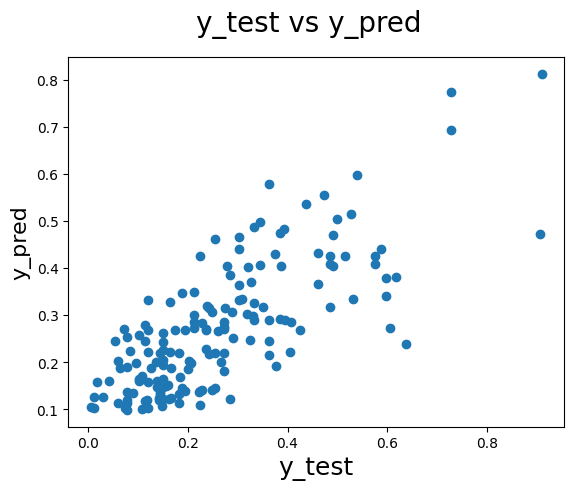

In [126]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test vs y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=18)
plt.ylabel("y_pred",fontsize=16)
plt.show()

In [127]:
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))


RMSE : 0.1110976927226206
MSE : 0.012342697328289826
MAE : 0.0846652772822674


In [130]:
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.56e-82
Time:                        19:52:48   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [131]:
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     75.10
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           9.15e-83
Time:                        19:52:58   Log-Likelihood:                 375.00
No. Observations:                 381   AIC:                            -728.0
Df Residuals:                     370   BIC:                            -684.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0638      0.012     

In [132]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     110.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.79e-71
Time:                        19:53:03   Log-Likelihood:                 336.26
No. Observations:                 381   AIC:                            -660.5
Df Residuals:                     375   BIC:                            -636.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0625      0.011     

SECOND MODEL IS BETTER AS COMPARE TO FIRST AND THIRD MODEL